The below Code is an implementation of research paper: Classification with Minimax Distance Measures by Morteza Haghir Chehreghani.

It introduces a new distance function obtained from the Minimal Spanning tree of the given data points which increases the performance of the classification models in comparison to the base distance. 

* Step 1: We make a complete graph out of the given points with edge weights as the base distance between them.
* Step2: We make a Minimal Spanning Tree(MST) out of it. 
* Step 3: Compute the Minimax distance measure between each points.
* Step 4: Compute Singular Value Decomposition on the pairwise distance matrix obtained.
* Step 5: Pick first k dimensions based on the eigen values.
* Step 6: Now you have the k dimensional space with minimax distance measure. Now compare the performances.






In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import array as arr
import networkx as nx
import numpy as np
from numpy import genfromtxt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.spatial.distance import pdist,squareform
import array as arr
import numpy as np
import math
import random
from sklearn.svm import LinearSVC
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder
def Norm_2(x,y): return abs((np.linalg.norm(x, ord=2)-np.linalg.norm(y,ord=2)))


In [8]:
Data=pd.read_excel(r'/content/gdrive/My Drive/Annular_Data.xlsx')
Data

,X,Y,Label
0,-1.9760,-1.94220,1
1,-1.9640,0.76081,1
2,-1.9542,-0.96706,1
3,-1.9485,-1.32580,1
4,-1.9266,1.01760,1
...,...,...,...
255,1.4200,0.50000,-1
256,2.3440,-1.80900,1
257,-0.8250,-1.33570,-1
258,2.7661,-1.11120,1


The given dataset

In [9]:
label= Data[Data.columns[-1:]].to_numpy()

In [10]:
Pos = Data[Data.columns[0:2]].to_numpy()

The Pos list contains all the coordinates of the points

In [11]:
adjacency_matrix=squareform(pdist(Pos, 'minkowski',p=2))

In [12]:
G= nx.Graph()
for i in range(len(Data.index)):
  G.add_node(i,pos=Pos[i],node_color="Red",node_size=100)

In [14]:
for i in range(len(Data.index)):
  for j in range(len(Data.index)):
    if(i!=j):
        G.add_edge(i,j,weight=adjacency_matrix[i][j])

In [15]:
print(G)

Graph with 260 nodes and 33670 edges


Used the Euclidean Distance as the edge weight

The Complete graph 

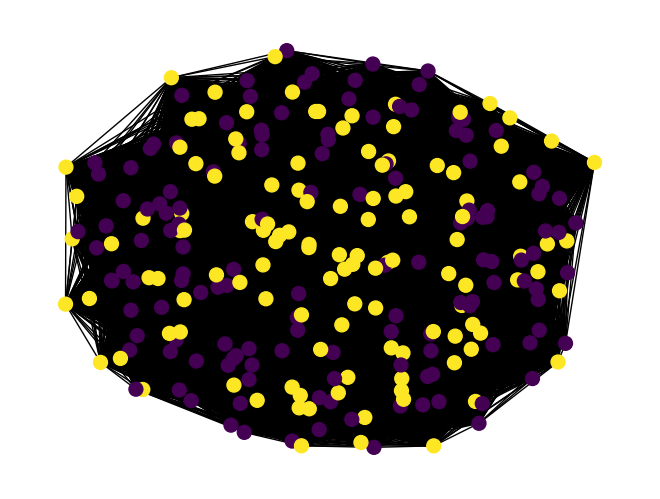

In [16]:
nx.draw(G,node_color=Data['Label'],node_size=100)

In [17]:
print(G)

Graph with 260 nodes and 33670 edges


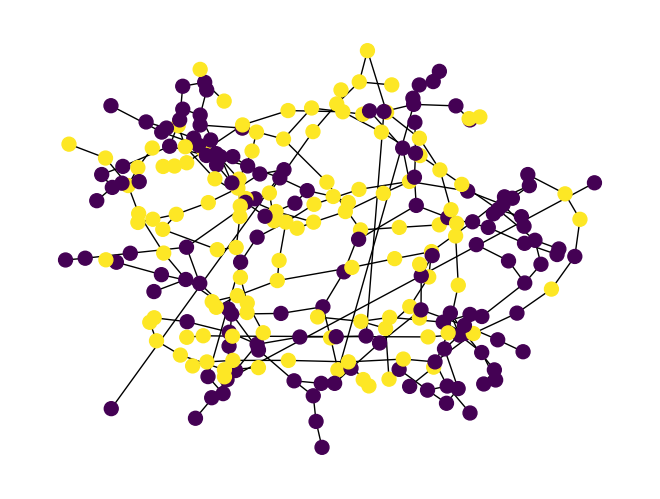

In [18]:
nx.draw(nx.minimum_spanning_tree(G),node_color=Data['Label'],node_size=100)

The MST

In [19]:
nx.shortest_path(nx.minimum_spanning_tree(G), source=1, target=8)

[1, 15, 9, 8]

In [20]:
MST=nx.minimum_spanning_tree(G)

In [21]:
print(MST)

Graph with 260 nodes and 259 edges


In [22]:
DMM=[]
for i in range(len(Data.index)):
  DMM.insert(i,[])
  for j in range(len(Data.index)):
    MM=0
    path=[]
    path=nx.shortest_path(MST, source=i, target=j)
    Path = np.asarray(path)
    for k in range(len(path)-1):
      if(MST.edges[Path[k],Path[k+1]]['weight']>MM):
        MM=MST.edges[Path[k],Path[k+1]]['weight']
    DMM[i].insert(j, MM)

In [57]:
DMM=np.array(DMM)
e=[]
for i in range(len(Data.index)):
    e.append(1.0)
I=np.identity(len(Data.index))
A=I-np.dot(1/len(Data.index),e,np.transpose(e, axes=None))
dMM=np.array(DMM)
a=np.array(A)
WMM = -0.5*np.dot(a,np.dot(DMM, a))

In [58]:
X = Data[Data.columns[0:2]].to_numpy()
Y = Data[Data.columns[-1:]].to_numpy().flatten()

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.33, random_state=42) ##Logistic Regression
clf=LogisticRegression()
clf.fit(X_train,Y_train)
Y_predicted = clf.predict(X_test)

In [31]:
score_log_before = clf.score(X_test, Y_test)
score_log_before

0.5

Accuracy score with base distance

In [32]:
X = Data[Data.columns[0:2]].to_numpy()
Y = Data[Data.columns[-1:]].to_numpy().flatten()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.33, random_state=42)
 
    # Train multi-classification model with logistic regression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
 
    # Train multinomial logistic regression model
mul_lr =LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, Y_train)
print ("Logistic regression Test Accuracy :: ", metrics.accuracy_score(Y_test, lr.predict(X_test)))
print ("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(Y_test, mul_lr.predict(X_test)))

Logistic regression Test Accuracy ::  0.5
Multinomial Logistic regression Test Accuracy ::  0.5


In [33]:
U, D, VT = np.linalg.svd(WMM)
YMM=np.dot(U,np.sqrt(np.diag(D)))
YMM = np.asmatrix(YMM)
my_data=pd.DataFrame(YMM)

In [34]:
my_data

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,259
0,-0.139458,0.020267,0.043652,-0.013627,0.002186,-0.014860,-0.000117,9.761688e-07,-8.047082e-06,0.000126,...,4.138556e-18,8.357378e-18,-2.891504e-18,-8.060980e-16,-3.375667e-16,-1.395304e-17,3.259201e-15,-2.866297e-16,-1.763632e-16,-1.421323e-09
1,0.043635,-0.033038,-0.103156,-0.071348,0.059232,-0.000848,0.004287,-2.147980e-04,-1.019516e-01,-0.002794,...,-3.651302e-17,2.771389e-17,-4.874945e-18,-8.058290e-16,-3.374181e-16,-1.369007e-17,3.259092e-15,-2.866040e-16,-1.760360e-16,-1.421323e-09
2,-0.154434,0.025543,0.076777,-0.037354,0.010381,0.128833,-0.000268,4.904920e-06,1.582158e-04,-0.001635,...,5.693475e-17,1.670910e-17,-6.204234e-18,-8.080273e-16,-3.376723e-16,-1.341178e-17,3.260698e-15,-2.864515e-16,-1.762891e-16,-1.421323e-09
3,-0.139089,0.020238,0.044741,-0.015295,0.003064,0.022613,-0.000033,4.802263e-07,-3.410605e-07,0.000030,...,3.864305e-17,2.164036e-17,2.365875e-17,-8.065847e-16,-3.379435e-16,-1.351155e-17,3.260172e-15,-2.865336e-16,-1.766288e-16,-1.421323e-09
4,0.043714,-0.033164,-0.103975,-0.072171,0.060062,-0.000862,0.004363,-2.187651e-04,-1.040747e-01,-0.002853,...,2.059084e-17,1.760903e-18,-9.770494e-19,-8.073850e-16,-3.381499e-16,-1.366517e-17,3.259531e-15,-2.864703e-16,-1.764784e-16,-1.421323e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.238135,0.101947,0.059777,0.040531,-0.018770,0.000851,-0.112834,-3.649432e-03,-2.487358e-02,-0.000560,...,-1.005966e-17,1.311532e-17,-9.561940e-18,-8.066386e-16,-3.376949e-16,-1.415893e-17,3.260111e-15,-2.867085e-16,-1.768364e-16,-1.421323e-09
256,0.102388,-0.243152,0.005452,-0.039217,-0.050067,0.000101,0.000035,-6.387384e-02,-9.331104e-04,-0.000041,...,1.552174e-17,1.038904e-17,-4.702081e-18,-8.067330e-16,-3.376421e-16,-1.386717e-17,3.259442e-15,-2.865884e-16,-1.768388e-16,-1.421323e-09
257,-0.152509,0.024815,0.070990,-0.031300,0.007032,-0.084727,-0.001037,1.151433e-05,2.290635e-04,-0.002302,...,2.079225e-17,2.286848e-18,-9.453213e-19,-8.060668e-16,-3.373632e-16,-1.419248e-17,3.258953e-15,-2.868131e-16,-1.761824e-16,-1.421323e-09
258,0.127225,-0.421298,0.100482,0.061025,0.024672,0.000033,0.000033,-9.186765e-02,6.928855e-03,0.000180,...,1.901904e-17,3.007750e-18,-3.627816e-18,-8.061696e-16,-3.376722e-16,-1.379362e-17,3.259517e-15,-2.865913e-16,-1.763881e-16,-1.421323e-09


In [35]:
score_log=pd.DataFrame()
score_log = score_log.append(pd.DataFrame({'dimension': 0 ,'accuracy': 0,}, index=[0]))
for i in range(len(Data.index)):
  X = my_data[my_data.columns[:i+1]].to_numpy() ##Logistic regression
  Y = Data[Data.columns[-1:]].to_numpy().flatten()
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.33, random_state=42)
  clf=LogisticRegression()
  clf.fit(X_train,Y_train)
  Y_predicted = clf.predict(X_test)
  np.concatenate((Y_test.reshape(-1,1),Y_predicted.reshape(-1,1)),axis=1) 
  sc=clf.score(X_test, Y_test)
  s = pd.DataFrame({'dimension': i+1 ,'accuracy': sc,'Eigen value':D[i]}, index=[i+1])
  score_log = score_log.append(s)


<ipython-input-35-0e6e766a4261>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_log = score_log.append(pd.DataFrame({'dimension': 0 ,'accuracy': 0,}, index=[0]))
<ipython-input-35-0e6e766a4261>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_log = score_log.append(s)
<ipython-input-35-0e6e766a4261>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_log = score_log.append(s)
<ipython-input-35-0e6e766a4261>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_log = score_log.append(s)
<ipython-input-35-0e6e766a4261>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

In [36]:
score_log

,dimension,accuracy,Eigen value
0,0,0.000000,NaN
1,1,0.558140,5.757769e+00
2,2,0.639535,2.866176e+00
3,3,0.593023,1.535812e+00
4,4,0.593023,1.149927e+00
...,...,...,...
256,256,0.720930,1.000000e-05
257,257,0.720930,1.000000e-05
258,258,0.720930,5.000000e-06
259,259,0.720930,5.000000e-06


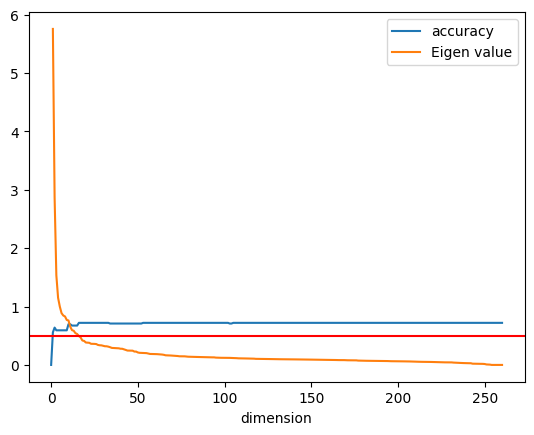

In [37]:
score_log.plot(x = 'dimension' ,y = ['accuracy','Eigen value'],kind= 'line')
plt.axhline(y = score_log_before, color = 'r', linestyle = '-')

In [38]:
score_log['accuracy'][70]

0.7209302325581395

Accuracy after embedding

In [39]:
X = my_data[my_data.columns[0:70]].to_numpy()
Y = Data[Data.columns[-1:]].to_numpy().flatten()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.33, random_state=42)
 
    # Train multi-classification model with logistic regression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
 
    # Train multinomial logistic regression model
mul_lr =LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, Y_train)
print ("Logistic regression Test Accuracy :: ", metrics.accuracy_score(Y_test, lr.predict(X_test)))
print ("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(Y_test, mul_lr.predict(X_test)))

Logistic regression Test Accuracy ::  0.7209302325581395
Multinomial Logistic regression Test Accuracy ::  0.7790697674418605


In [40]:
X = Data[Data.columns[0:4]].to_numpy()
Y = Data[Data.columns[-1:]].to_numpy().flatten()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.33, random_state=42)
clf2 = LinearSVC()
clf2.fit(X_train,Y_train)
Y_predicted2 = clf2.predict(X_test)
accuracy_score(Y_test,Y_predicted2)
np.concatenate((Y_test.reshape(-1,1),Y_predicted2.reshape(-1,1)),axis=1) 
# fist column = Y_test(truth), second column = Y_predicted

array([[ 1,  1],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [-1, -1],
       [ 1,  1],
       [-1, -1],
       [ 1,  1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [ 1,  1],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [ 1,  1],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [-1, -1],
       [ 1,  1],
       [ 1,  1],
       [ 1,  1],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [ 1,  1],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [ 1,  1],
       [ 1,  1

In [41]:
score_svc_before = clf2.score(X_test, Y_test)
score_svc_before

1.0

Accuracy before embedding

In [42]:
score_linSVC=pd.DataFrame()
score_linSVC = score_linSVC.append(pd.DataFrame({'dimension': 0 ,'accuracy': 0,}, index=[0]))

for i in range(len(Data.index)):
  X = my_data[my_data.columns[:i+1]].to_numpy()
  Y = Data[Data.columns[-1:]].to_numpy().flatten()
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.33, random_state=42)
  clf2 = LinearSVC()
  clf2.fit(X_train,Y_train)
  Y_predicted2 = clf2.predict(X_test)
  accuracy_score(Y_test,Y_predicted2)
  np.concatenate((Y_test.reshape(-1,1),Y_predicted2.reshape(-1,1)),axis=1) 
  # fist column = Y_test(truth), second column = Y_predicted
  sc=clf2.score(X_test, Y_test)
  s = pd.DataFrame({'dimension': i+1 ,'accuracy': sc,'Eigen value':D[i]}, index=[i+1])
  score_linSVC = score_linSVC.append(s)


<ipython-input-42-a5c37c6f85af>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_linSVC = score_linSVC.append(pd.DataFrame({'dimension': 0 ,'accuracy': 0,}, index=[0]))
<ipython-input-42-a5c37c6f85af>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_linSVC = score_linSVC.append(s)
<ipython-input-42-a5c37c6f85af>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_linSVC = score_linSVC.append(s)
<ipython-input-42-a5c37c6f85af>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_linSVC = score_linSVC.append(s)
<ipython-input-42-a5c37c6f85af>:16: FutureWarning: The frame.append method is deprecated and will be removed 

In [43]:
score_linSVC

,dimension,accuracy,Eigen value
0,0,0.000000,NaN
1,1,0.558140,5.757769e+00
2,2,0.593023,2.866176e+00
3,3,0.616279,1.535812e+00
4,4,0.627907,1.149927e+00
...,...,...,...
256,256,0.790698,1.000000e-05
257,257,0.790698,1.000000e-05
258,258,0.790698,5.000000e-06
259,259,0.790698,5.000000e-06


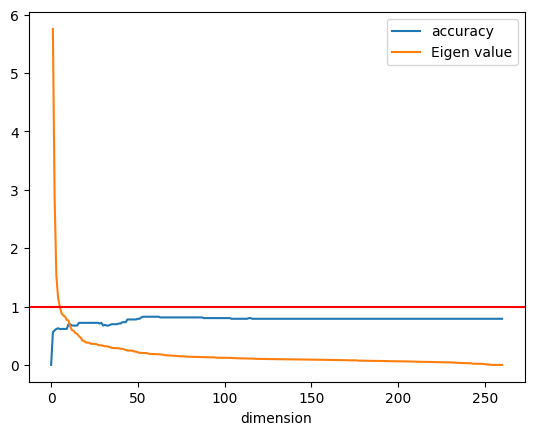

In [44]:
score_linSVC.plot(x='dimension',y=['accuracy','Eigen value'],kind= 'line' )
plt.axhline(y = score_svc_before,  color = 'r', linestyle ='-')

In [45]:
score_linSVC['accuracy'][70]

0.813953488372093

Accuracy after embedding

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@KNN@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [46]:
df1=pd.DataFrame(adjacency_matrix)

In [47]:
idx1 = np.argsort(df1.values, 1)[:, 0:len(Data.index)][:,1]
idx1
idx1=np.array(idx1)
idx1

array([231,   4,   6,  12,   5,  11,   2,  10,  16,  15,   7,  13,   3,
        11, 245,   9,  18,   6,  16,  23,  31,  23,  25,  19,  34,  30,
        28,  32,  26,  39,  33,  20,  27,  28,  24,  36,  35,  42,  31,
        29,  39,  42,  41,  50,  42,  31,  51,  56,  49,  48,  43,  46,
        60,  54,  53,  58,  59, 225,  55,  56,  66,  64,  49, 225,  61,
        71,  60,  66,  74,  65,  64,  65, 254,  59,  68,  78,  79,  81,
        75,  76,  70,  77,  87,  86,  95,  86,  85, 100,  89, 228,  94,
       108, 101,  85,  98, 103, 103, 104,  99,  98,  87, 106,  93, 237,
        99, 100, 101, 111, 112, 106, 105, 107, 108, 119, 122, 117, 111,
       112, 237, 113, 121, 120, 123, 122, 109, 123, 127, 126, 133, 126,
       132, 137, 134, 128, 132, 144, 233, 146, 140, 145, 138, 148, 156,
       153, 135, 150, 147, 146, 141, 155, 145, 162, 164, 158, 165, 165,
       159, 148, 153, 156, 168, 150, 151, 164, 163, 154, 162, 243, 160,
       158, 163, 170, 155, 236, 168, 174, 157, 178, 177, 181, 18

In [48]:
l1=list(np.array(label)[idx1])
#l1=np.array(l1)
l1

[array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([-1]),
 array([-1]),
 array([1]),
 array([-1]),
 array([-1]),
 array([1]),
 array([-1]),
 array([1]),
 array([-1]),
 array([-1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([-1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([1]),
 array([-1]),
 array([1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([1]),
 array([1]),
 array([1]),
 array([-1]),
 array([1]),
 array([-1]),
 array([-1]),
 array([1]),
 array([1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([1]),
 array([1]),
 array([1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([1]),

In [49]:
c=0
for i in range (len(Data.index)):
  if(label[i]==l1[i]):
    c=c+1
c/len(Data.index)

0.8961538461538462

In [50]:
df=pd.DataFrame(DMM)

In [51]:
idx = np.argsort(df.values, 1)[:, 0:len(Data.index)][:,1]
idx
idx=np.array(idx)
idx

array([231,   4,   6,  12,   5,  13,   2,  10,  18,  15,   7,  13,   3,
        11, 245,   9,  18,   2,  16,  23,  31,  23,  25,  19,  34,  26,
        28,  32,  26,  39,  26,  20,  27,  26,  24,  36,  35,  42,   0,
        29,  23,  42,  41,  50,  42,   0,  51,  59,  49,  48,  43,  46,
        66,  54,  53,  58,  59, 225,  55,  56,  66,  64,  23, 225,  61,
        71,  60,  52,  74,  71,  61,  65,  78,  59,  68,  78,  79,  81,
        75,  76,  61,  77, 100,  85, 103,  86,  85, 100,  89, 228,  94,
       108, 106,  85,  97, 103,  84,  98,  99,  98,  87, 106, 105, 237,
        98, 100, 101, 111, 112, 106, 105, 107, 108, 119, 122,  91, 102,
        91, 103, 113, 121, 120, 123, 122, 106, 114, 127, 126, 133, 127,
       134, 154, 134, 128, 132, 144, 233, 154, 140, 145, 138, 148, 156,
       153, 135, 150, 147, 146, 141, 131, 145, 162, 164, 158, 165, 131,
       159, 148, 153, 156, 168, 145, 151, 164, 163, 154, 151, 243, 160,
       153, 164, 164, 151, 252, 168, 168, 179, 178, 177, 181, 19

In [52]:
l=[]
l=list(np.array(label)[idx])

In [53]:
idx1 = np.argsort(df.values, 1)[:, 0:300]
idx1

array([[  0, 231,  31, ..., 240, 242, 230],
       [  1,   4,   5, ..., 240, 242, 230],
       [  2,   6,  17, ..., 240, 242, 230],
       ...,
       [257, 110, 105, ..., 240, 242, 230],
       [258, 163, 164, ..., 240, 242, 230],
       [259,  16,  15, ..., 240, 242, 230]])

In [54]:
c=0
for i in range (len(Data.index)):
  if(label[i]==l[i]):
    c=c+1
c/len(Data.index)

0.8846153846153846

In [55]:
#for original space
X = Data[Data.columns[:4]].to_numpy()
Y = Data[Data.columns[-1:]].to_numpy().flatten()

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
# Importing and fitting KNN classifier for k=1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
# Predicting results using Test data set
pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

1.0

In [56]:
#For embedded space
X = my_data[my_data.columns[:70]].to_numpy()
Y = Data[Data.columns[-1:]].to_numpy().flatten()
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
# Importing and fitting KNN classifier for k=1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
# Predicting results using Test data set
pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.8333333333333334